In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os
import glob
%matplotlib inline

#data_folder = "/Users⁩/supertramp⁩/Documents⁩/GitHub⁩/IDS-project⁩/data/";
#data = pd.read_csv(data_folder + "activities.csv")

In [11]:
# get all csv files 
all_files = glob.glob( '*.csv' )
print(all_files)

['activities4.csv', 'activities5.csv', 'activities2.csv', 'activities3.csv', 'activities1.csv']


In [12]:
# merge all csv files and add 'id' variable to identify all ids
ds = []
i = 0
for filename in all_files:
    i = i + 1
    dataset = pd.read_csv(filename, encoding= 'unicode_escape')
    dataset['id'] = i
    ds.append(dataset)
datasets = pd.concat(ds, axis=0, ignore_index=True)
datasets = datasets[datasets['Activity Type'].str.match('Run')]
datasets['Elapsed Time'] = datasets['Elapsed Time'].div(1000) # convert to minutes
datasets.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,...,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,id
count,4.743000e+03,4743.000000,4743.000000,793.000000,3622.000000,0.0,4638.000000,4741.000000,4742.000000,4028.00000,...,1.00,0.0,3.850000e+02,1.00,1.0,1.00,1.0,1.0,1.000000,4743.000000
mean,1.455938e+09,6.580301,11.392905,69.615385,63.189972,NaN,6597.670332,5176.208606,11399.281663,5.68844,...,0.08,NaN,3.873804e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,3.018975
std,1.013563e+09,10.766343,7.949239,82.960284,8.845964,NaN,10834.559107,8201.898124,7948.357097,2.85853,...,NaN,NaN,7.876277e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.355300
min,1.020407e+08,0.000000,0.000000,0.000000,52.162899,NaN,0.000000,0.000000,0.000000,0.00000,...,0.08,NaN,3.305343e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,1.000000
25%,5.065851e+08,2.546000,6.700000,19.000000,52.163101,NaN,2545.000000,2315.000000,6701.250000,4.10000,...,0.08,NaN,3.305343e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,2.000000
50%,1.315308e+09,3.895000,9.660000,43.000000,65.770599,NaN,3904.000000,3445.000000,9667.750000,5.00000,...,0.08,NaN,3.343742e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,3.000000
75%,2.258636e+09,6.097500,13.840000,81.000000,65.770897,NaN,6099.000000,5175.000000,13843.500000,6.20000,...,0.08,NaN,4.034677e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,4.000000
max,3.539061e+09,210.820000,94.910000,641.000000,79.378700,NaN,210820.000000,187200.000000,94912.000000,30.50000,...,0.08,NaN,5.813859e+06,0.01,5.0,0.22,16093.0,5.0,340.299988,5.000000


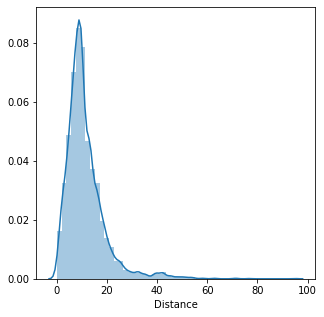

In [28]:
plt.figure(figsize=(5,5))
plt.tight_layout()
seabornInstance.distplot(datasets['Distance'])


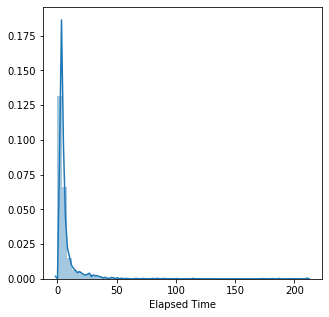

In [30]:
plt.figure(figsize=(5,5))
plt.tight_layout()
seabornInstance.distplot(datasets['Elapsed Time'])


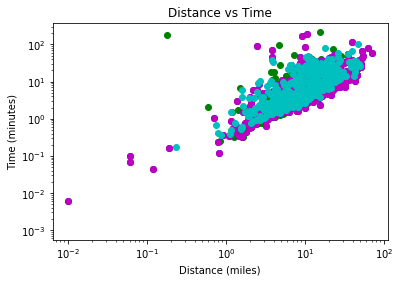

In [31]:
colors = ['r','g','b','m', 'c', 'k']
plt.figure()
for i in datasets['id'].unique():
    x = datasets[datasets.id == i+1]
    plt.plot(x['Distance'], x['Elapsed Time'], 'o', color = colors[i])
    
plt.title('Distance vs Time')  
plt.xlabel('Distance (miles)')  
plt.ylabel('Time (minutes)')  
plt.yscale('log')
plt.xscale('log')
plt.show()



In [ ]:

predictors = ['Distance', 'Max Speed', 'Elevation Gain',
             'Max Grade', 'Average Grade', 'Relative Effort'];

# extra predictors that van be used later are: "Calories", 'Average Temperature',  'Elevation Loss', 'Relative Effort', 'Relative Effort'

get rid of NaN values


In [ ]:

from sklearn.impute import SimpleImputer

variables_to_use = ['Distance', 'Max Speed', 'Elevation Gain',
             'Max Grade', 'Average Grade','Elapsed Time', 'Relative Effort']
dataset_final = dataset[variables_to_use]


dataset_final.apply(lambda x: x.fillna(x.mean()),axis=0)
dataset_final = dataset_final.reset_index()
#dataset_final.mean()

In [ ]:
X = dataset_final[predictors]
y = dataset_final['Elapsed Time']
X = X.fillna(method = 'pad')
#X['Relative Effort'].isnull().values.any() 
X = X.fillna(0)
X.isnull().any()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
regressor = LinearRegression()  
LR = regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
LR.score(X_test, y_test)

In [ ]:
y_pred = LR.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, color = 'gray')
plt.xlabel('test elapsed time')
plt.ylabel('pred elapsed time')
plt.show()